In [2]:
#https://data.world/datadavis/nba-salaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\players.csv')
sal = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\salaries.csv')

In [3]:
players.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [4]:
sal.columns

Index(['league', 'player_id', 'salary', 'season', 'season_end', 'season_start',
       'team'],
      dtype='object')

In [5]:
print(sal.shape)
print(players.shape)

(14163, 7)
(4685, 24)


In [6]:
#Merge datasets by player name
sals = pd.merge(players, sal, left_on='_id', right_on='player_id')

In [7]:
sals

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,position,shoots,weight,league,player_id,salary,season,season_end,season_start,team
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,zipsepa01,"February 18, 1994","Heidelberg, Germany",0.8,37.1,33.5,76.9,98,6.1,4.7,...,Small Forward,Right,215lb,NBA,zipsepa01,750000,2016-17,2017,2016,Chicago Bulls
14159,zipsepa01,"February 18, 1994","Heidelberg, Germany",0.8,37.1,33.5,76.9,98,6.1,4.7,...,Small Forward,Right,215lb,NBA,zipsepa01,1312611,2017-18,2018,2017,Chicago Bulls
14160,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,Center,Right,254lb,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,Center,Right,240lb,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers


In [8]:
sals.shape

(14163, 31)

In [9]:
sals.isna().sum()

_id                0
birthDate          0
birthPlace         0
career_AST         0
career_FG%         0
career_FG3%        0
career_FT%         0
career_G           0
career_PER         0
career_PTS         0
career_TRB         0
career_WS          0
career_eFG%        0
college         1636
draft_pick      1902
draft_round     1902
draft_team      1902
draft_year      1902
height             0
highSchool       989
name               0
position           0
shoots             0
weight             0
league             0
player_id          0
salary             0
season             0
season_end         0
season_start       0
team               4
dtype: int64

In [10]:
#Filter columns to keep 
sals = sals.drop(['birthDate', 'birthPlace', 'college', 'draft_round', 'draft_team', 'highSchool', 'league', 'player_id', 
        'season', 'season_end', 'team'], axis=1)


#Change name column to show first 
first_column = sals.pop('name')
sals.insert(0, 'name', first_column)

sals.columns

Index(['name', '_id', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'draft_pick', 'draft_year', 'height', 'position',
       'shoots', 'weight', 'salary', 'season_start'],
      dtype='object')

In [11]:
#Check the null values for draft pick and make sure that they mean undrafted
df = sals[sals['draft_pick'].isna()]
df = df[['name', 'draft_pick']]
df

#change draft_pick values to 0 to indicate undrafted
sals['draft_pick'] = sals['draft_pick'].fillna(0)
sals['draft_year'] = sals['draft_year'].fillna(0)

sals.isna().sum()

name            0
_id             0
career_AST      0
career_FG%      0
career_FG3%     0
career_FT%      0
career_G        0
career_PER      0
career_PTS      0
career_TRB      0
career_WS       0
career_eFG%     0
draft_pick      0
draft_year      0
height          0
position        0
shoots          0
weight          0
salary          0
season_start    0
dtype: int64

In [12]:
#Saving csv
sals.to_csv(r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\sals.csv', index = False)

In [12]:
#Re-importing csv 
sals = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\sals.csv')

sals

,name,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_year,height,position,shoots,weight,salary,season_start
0,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1990,6-10,Power Forward,Right,240lb,395000,1990
1,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1990,6-10,Power Forward,Right,240lb,494000,1991
2,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1990,6-10,Power Forward,Right,240lb,500000,1992
3,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1990,6-10,Power Forward,Right,240lb,805000,1993
4,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25th overall,1990,6-10,Power Forward,Right,240lb,650000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48th overall,2016,6-8,Small Forward,Right,215lb,750000,2016
14159,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48th overall,2016,6-8,Small Forward,Right,215lb,1312611,2017
14160,Ante Zizic,zizican01,0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,23rd overall,2016,6-11,Center,Right,254lb,1645200,2017
14161,Ivica Zubac,zubaciv01,0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,54.0,32nd overall,2016,7-1,Center,Right,240lb,1034956,2016


In [13]:
#Changing row values for draft pick to only numbers 
sals['draft_pick'] = sals['draft_pick'].str.extract('(\d+)')

In [14]:
print(sals['draft_pick'].value_counts())

0      1902
1       463
5       422
3       408
2       401
       ... 
115       1
148       1
80        1
122       1
221       1
Name: draft_pick, Length: 113, dtype: int64


In [15]:
sals['draft_pick'] = sals['draft_pick'].astype(int)

In [16]:
#Only keep the first/primary position of a player
sals['position'] = sals['position'].str.split('and').str[0]

In [17]:
#Removing blank space to combine the positions with same name after substringing
sals['position'] = sals['position'].str.strip()

In [19]:
print(sals['position'].value_counts())

Power Forward     3039
Center            2916
Shooting Guard    2803
Small Forward     2787
Point Guard       2618
Name: position, dtype: int64


In [20]:
#Only keeping weight values
sals['weight'] = sals['weight'].str.rstrip('lb')

In [21]:
print(sals['weight'].value_counts())

220    962
210    753
215    740
240    724
190    722
      ... 
330      1
211      1
315      1
360      1
153      1
Name: weight, Length: 138, dtype: int64


In [22]:
#Changing height to inches
sals[["feet", "inches"]] = sals["height"].str.split(pat="-", expand=True)

In [23]:
sals

,name,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,...,draft_pick,draft_year,height,position,shoots,weight,salary,season_start,feet,inches
0,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,...,25,1990,6-10,Power Forward,Right,240,395000,1990,6,10
1,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,...,25,1990,6-10,Power Forward,Right,240,494000,1991,6,10
2,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,...,25,1990,6-10,Power Forward,Right,240,500000,1992,6,10
3,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,...,25,1990,6-10,Power Forward,Right,240,805000,1993,6,10
4,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,...,25,1990,6-10,Power Forward,Right,240,650000,1994,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,...,48,2016,6-8,Small Forward,Right,215,750000,2016,6,8
14159,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,...,48,2016,6-8,Small Forward,Right,215,1312611,2017,6,8
14160,Ante Zizic,zizican01,0.6,58.3,-,70.8,91,17.5,6.4,4.2,...,23,2016,6-11,Center,Right,254,1645200,2017,6,11
14161,Ivica Zubac,zubaciv01,0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,...,32,2016,7-1,Center,Right,240,1034956,2016,7,1


In [24]:
#Format the feet and inches columns for calculation
sals = sals.drop(['height'], axis=1)
sals['feet'] = sals['feet'].astype(int)
sals['inches'] = sals['inches'].astype(int)

In [25]:
#Converting feet and inches to total inches
sals["height"] = (sals["feet"] * 12) + sals["inches"]
sals = sals.drop(["feet", "inches"], axis=1)

In [26]:
#Move height column
col = sals.pop('height')
sals.insert(17, 'height', col)

In [27]:
#Move salary column
col = sals.pop('salary')
sals.insert(19, 'salary', col)

In [28]:
sals['shoots'].value_counts()
sals[sals['shoots'] == 'Left Right']

#Only instance is a player who now shoots right handed
sals['shoots'] = sals['shoots'].replace(['Left Right'], 1)

#Change left and right handedness 
sals['shoots'] = sals['shoots'].replace(['Right'], 1)
sals['shoots'] = sals['shoots'].replace(['Left'], 0)
sals['shoots'].value_counts()

1    12985
0     1178
Name: shoots, dtype: int64

In [29]:
#Changing positions to numerical values
sals['position'] = sals['position'].replace(['Point Guard'], 1)
sals['position'] = sals['position'].replace(['Shooting Guard'], 2)
sals['position'] = sals['position'].replace(['Small Forward'], 3)
sals['position'] = sals['position'].replace(['Power Forward'], 4)
sals['position'] = sals['position'].replace(['Center'], 5)

In [30]:
print(sals['position'].value_counts())

4    3039
5    2916
2    2803
3    2787
1    2618
Name: position, dtype: int64


In [31]:
sals.dtypes

name             object
_id              object
career_AST      float64
career_FG%       object
career_FG3%      object
career_FT%       object
career_G          int64
career_PER       object
career_PTS      float64
career_TRB      float64
career_WS       float64
career_eFG%      object
draft_pick        int32
draft_year        int64
position          int64
shoots            int64
weight           object
height            int32
season_start      int64
salary            int64
dtype: object

In [32]:
#Change - to 0 to represent no made shots
sals['career_FG%'] = sals['career_FG%'].replace(['-'], 0.0)
sals['career_FG3%'] = sals['career_FG3%'].replace(['-'], 0.0)
sals['career_FT%'] = sals['career_FT%'].replace(['-'], 0.0)

In [33]:
#Delete rows without a valid PER or efg%
sals = sals[sals['career_PER'] != '-']
sals = sals[sals['career_eFG%'] != '-']

In [34]:
#Make all remaining data types numerical to group the players and find the means for each
pos_dict = {'career_FG%': float,
        'career_FG3%': float,
        'career_FT%': float,
        'career_PER': float,
        'career_eFG%': float,
        'weight': float
        }

sals = sals.astype(pos_dict)
sals.dtypes

name             object
_id              object
career_AST      float64
career_FG%      float64
career_FG3%     float64
career_FT%      float64
career_G          int64
career_PER      float64
career_PTS      float64
career_TRB      float64
career_WS       float64
career_eFG%     float64
draft_pick        int32
draft_year        int64
position          int64
shoots            int64
weight          float64
height            int32
season_start      int64
salary            int64
dtype: object

In [35]:
sals

,name,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_year,position,shoots,weight,height,season_start,salary
0,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1990,395000
1,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1991,494000
2,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1992,500000
3,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1993,805000
4,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1994,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48,2016,3,1,215.0,80,2016,750000
14159,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48,2016,3,1,215.0,80,2017,1312611
14160,Ante Zizic,zizican01,0.6,58.3,0.0,70.8,91,17.5,6.4,4.2,3.0,58.3,23,2016,5,1,254.0,83,2017,1645200
14161,Ivica Zubac,zubaciv01,0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,54.0,32,2016,5,1,240.0,85,2016,1034956


In [36]:
#Save csv again with all numerical values
sals.to_csv(r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\num_sals.csv', index = False)

In [25]:
#Re-importing csv 
sals = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\num_sals.csv')

In [26]:
sals

,name,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_year,position,shoots,weight,height,season_start,salary
0,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1990,395000
1,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1991,494000
2,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1992,500000
3,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1993,805000
4,Alaa Abdelnaby,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,25,1990,4,1,240.0,82,1994,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14146,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48,2016,3,1,215.0,80,2016,750000
14147,Paul Zipser,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,48,2016,3,1,215.0,80,2017,1312611
14148,Ante Zizic,zizican01,0.6,58.3,0.0,70.8,91,17.5,6.4,4.2,3.0,58.3,23,2016,5,1,254.0,83,2017,1645200
14149,Ivica Zubac,zubaciv01,0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,54.0,32,2016,5,1,240.0,85,2016,1034956


In [27]:
sals.columns

Index(['name', '_id', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'draft_pick', 'draft_year', 'position', 'shoots',
       'weight', 'height', 'season_start', 'salary'],
      dtype='object')

Text(0.5, 1.0, 'Year and Salary 1984-2017')

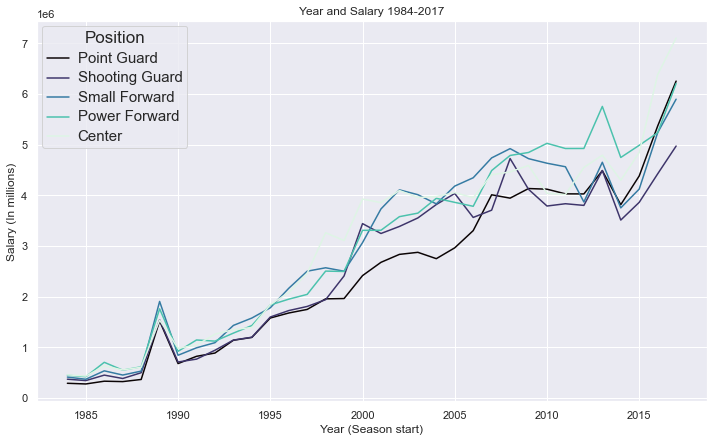

In [28]:
#Graph salaries over time based on position 
#Before taking the average for a player's career
sns.set(rc={"figure.figsize":(12,7)}) 

time = sns.lineplot(data=sals, x='season_start', y='salary', hue='position',  
                    hue_order=["1", "2", "3", "4", "5"], ci= None, palette = "mako")
plt.legend(title="Position", labels=["Point Guard", "Shooting Guard", "Small Forward", "Power Forward", "Center"])
plt.xlabel("Year (Season start)")
plt.ylabel("Salary (In millions)")
plt.setp(time.get_legend().get_texts(), fontsize='15')
plt.setp(time.get_legend().get_title(), fontsize='17') 
plt.title("Year and Salary 1984-2017")

In [29]:
#Take the averages for every player and group by each one 
career_sal = sals.groupby('name').mean().reset_index()

In [30]:
career_sal

,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_year,position,shoots,weight,height,season_start,salary
0,A.C. Green,1.1,49.4,25.4,73.4,1278.0,14.4,9.6,7.4,99.5,50.1,23.0,1985.0,4.0,1.0,220.0,81.0,1992.933333,2.747885e+06
1,A.J. Bramlett,0.0,19.0,0.0,0.0,8.0,-0.4,1.0,2.8,-0.2,19.0,39.0,1999.0,5.0,1.0,227.0,82.0,1999.000000,1.189740e+05
2,A.J. English,2.1,43.5,13.8,77.8,151.0,11.6,9.9,2.1,1.1,43.8,37.0,1990.0,2.0,1.0,175.0,75.0,1991.800000,2.612000e+05
3,A.J. Guyton,1.8,37.7,37.8,82.2,80.0,10.9,5.5,1.0,0.3,46.0,32.0,2000.0,1.0,1.0,180.0,73.0,2001.000000,2.671890e+05
4,A.J. Hammons,0.2,40.5,50.0,45.0,22.0,8.4,2.2,1.6,0.0,46.4,46.0,2016.0,5.0,1.0,260.0,84.0,2016.500000,9.813055e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,Zendon Hamilton,0.2,44.0,0.0,66.0,134.0,14.0,4.4,3.5,3.0,44.0,0.0,0.0,5.0,0.0,250.0,83.0,2002.600000,4.810244e+05
2381,Zhou Qi,0.1,21.2,10.5,66.7,19.0,2.5,1.3,1.2,-0.2,24.2,43.0,2016.0,4.0,1.0,210.0,85.0,2017.000000,8.156150e+05
2382,Zoran Dragic,0.3,36.7,21.4,60.0,16.0,8.2,1.8,0.5,-0.1,41.7,0.0,0.0,2.0,0.0,200.0,77.0,2014.500000,2.006250e+06
2383,Zoran Planinic,1.1,40.5,28.9,67.7,148.0,9.6,3.8,1.3,1.5,44.3,22.0,2003.0,1.0,1.0,195.0,79.0,2004.500000,8.278200e+05


In [31]:
#Noticed some of the positions and shooting hands changed, so rounding will find position mostly played
#Year was also made into an average
career_sal['position'] = career_sal['position'].round()
career_sal['season_start'] = career_sal['season_start'].round()
career_sal['shoots'] = career_sal['shoots'].round()

In [32]:
print(career_sal['position'].value_counts())

2.0    509
5.0    494
4.0    492
3.0    456
1.0    434
Name: position, dtype: int64


In [33]:
#Change position back to a cateogry 
career_sal['position'] = career_sal['position'].astype(int)

In [34]:
print(career_sal['position'].value_counts())

2    509
5    494
4    492
3    456
1    434
Name: position, dtype: int64


In [35]:
#Convert to string for easy graphing
career_sal['position'] = career_sal['position'].astype(str)

Text(0.5, 1.0, 'Year and Salary 1984-2017')

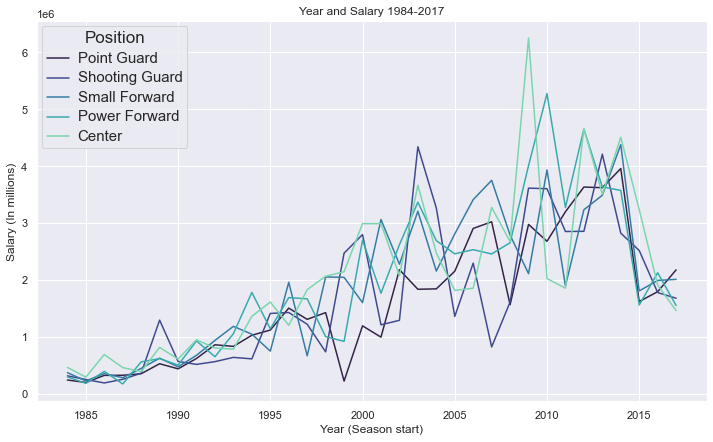

In [36]:
#Graph salaries over time based on position 
#After taking the average for a player's career
sns.set(rc={"figure.figsize":(12,7)}) 

time = sns.lineplot(data=career_sal, x='season_start', y='salary', hue='position',  
                    hue_order=["1", "2", "3", "4", "5"], ci= None, palette="mako")
plt.legend(title="Position", labels=["Point Guard", "Shooting Guard", "Small Forward", "Power Forward", "Center"])
plt.xlabel("Year (Season start)")
plt.ylabel("Salary (In millions)")
plt.setp(time.get_legend().get_texts(), fontsize='15')
plt.setp(time.get_legend().get_title(), fontsize='17') 
plt.title("Year and Salary 1984-2017")

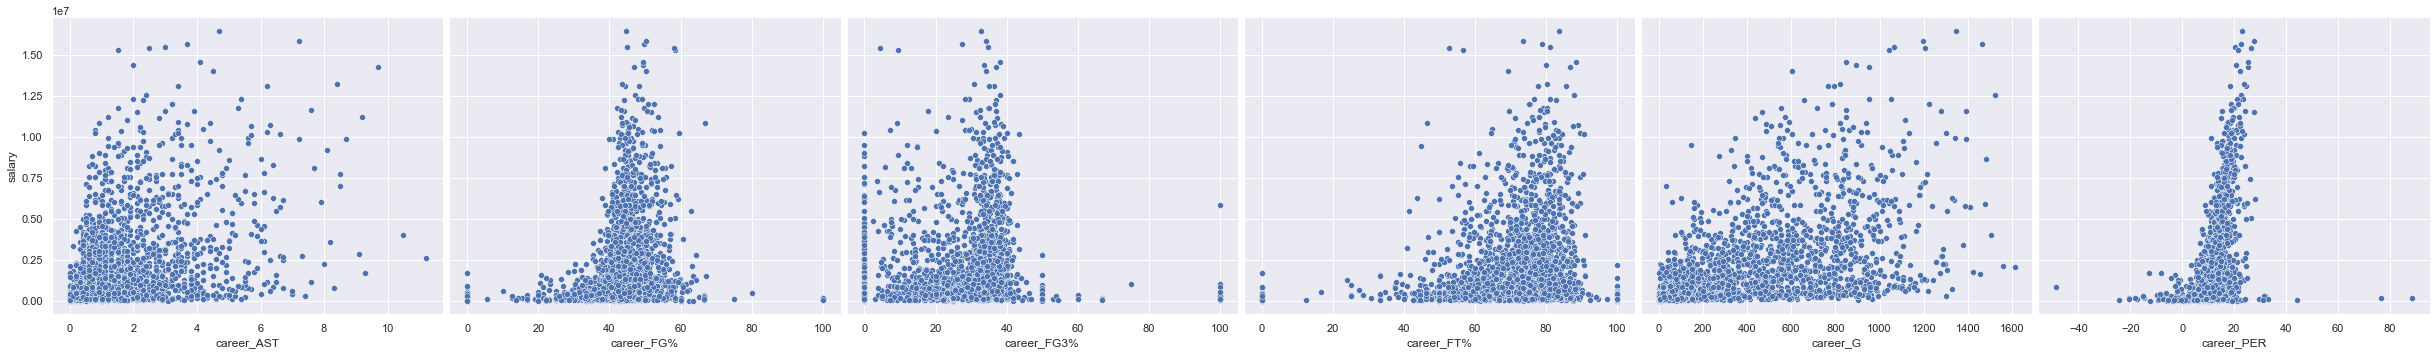

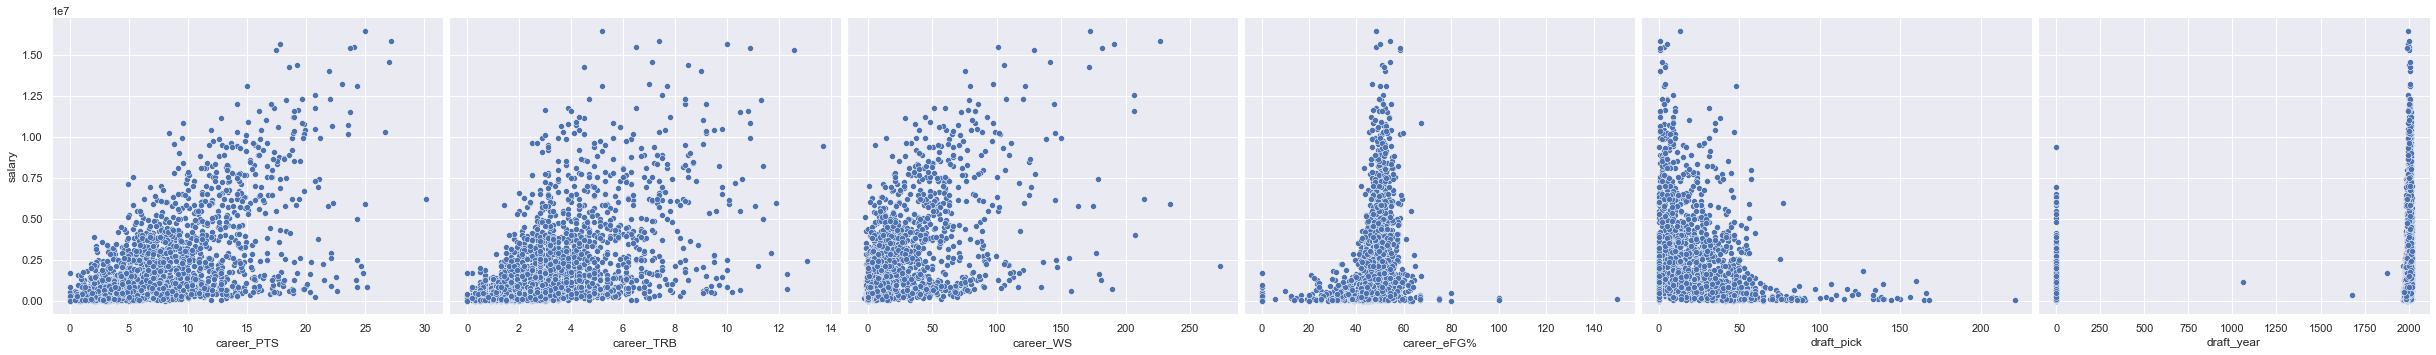

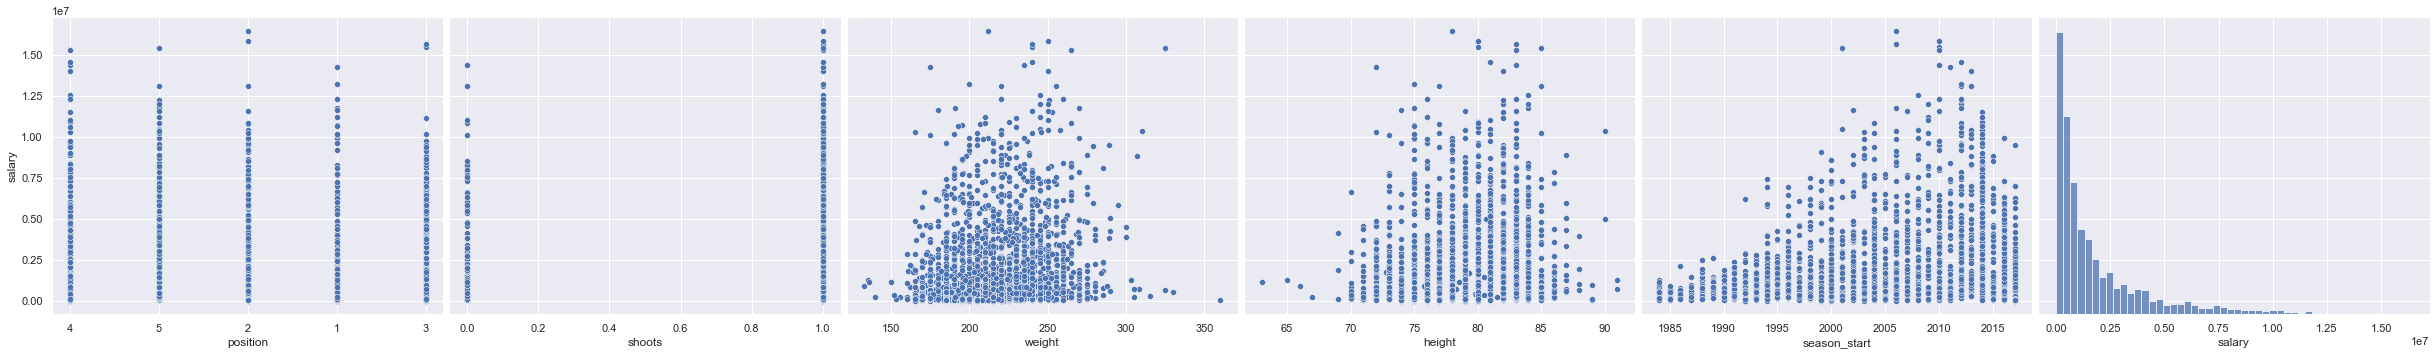

In [76]:
#View initial relationships in scatter plot matrix
sns.set_theme(style="darkgrid")

sc_plt1 = sns.pairplot(
    career_sal,
    x_vars=['career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G', 'career_PER'],
    y_vars=["salary"],
    height=5,
    aspect=1.15,
)

sc_plt2 = sns.pairplot(
    career_sal,
    x_vars=['career_PTS', 'career_TRB', 'career_WS', 'career_eFG%', 'draft_pick', 'draft_year'],
    y_vars=["salary"],
    height=5,
    aspect=1.15,
)

sc_plt3 = sns.pairplot(
    career_sal,
    x_vars=['position', 'shoots', 'weight', 'height', 'season_start', 'salary'],
    y_vars=["salary"],
    height=5,
    aspect=1.15,
)

In [77]:
#Create dummy variables for position
position_dummies = pd.get_dummies(career_sal['position'])
position_dummies = position_dummies.rename(columns={"1": "PG", "2": "SG", "3": "SF", "4": "PF", "5": "C"})
position_dummies


,PG,SG,SF,PF,C
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2380,0,0,0,0,1
2381,0,0,0,1,0
2382,0,1,0,0,0
2383,1,0,0,0,0


In [78]:
#Change the shooting hand type to an int, and then a string
career_sal['shoots'] = career_sal['shoots'].astype(int)
career_sal['shoots'] = career_sal['shoots'].astype(str)

#Create dummy variables for shooting hand
shoots_dummies = pd.get_dummies(career_sal['shoots'])
shoots_dummies = shoots_dummies.rename(columns={"0": "Left", "1": "Right"})
shoots_dummies

,Left,Right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2380,1,0
2381,0,1
2382,1,0
2383,0,1


In [79]:
#Use k-1 dummy variables 
shoots_dummies = shoots_dummies.drop(['Left'], axis=1)
position_dummies = position_dummies.drop(['C'], axis=1)

print(shoots_dummies.columns)
print(position_dummies.columns)

Index(['Right'], dtype='object')
Index(['PG', 'SG', 'SF', 'PF'], dtype='object')


In [80]:
#Combining dummy variables to the dataset
career_sal = pd.concat([career_sal, position_dummies], axis=1)
career_sal = pd.concat([career_sal, shoots_dummies], axis=1)

In [81]:
career_sal

,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,...,shoots,weight,height,season_start,salary,PG,SG,SF,PF,Right
0,A.C. Green,1.1,49.4,25.4,73.4,1278.0,14.4,9.6,7.4,99.5,...,1,220.0,81.0,1993.0,2.747885e+06,0,0,0,1,1
1,A.J. Bramlett,0.0,19.0,0.0,0.0,8.0,-0.4,1.0,2.8,-0.2,...,1,227.0,82.0,1999.0,1.189740e+05,0,0,0,0,1
2,A.J. English,2.1,43.5,13.8,77.8,151.0,11.6,9.9,2.1,1.1,...,1,175.0,75.0,1992.0,2.612000e+05,0,1,0,0,1
3,A.J. Guyton,1.8,37.7,37.8,82.2,80.0,10.9,5.5,1.0,0.3,...,1,180.0,73.0,2001.0,2.671890e+05,1,0,0,0,1
4,A.J. Hammons,0.2,40.5,50.0,45.0,22.0,8.4,2.2,1.6,0.0,...,1,260.0,84.0,2016.0,9.813055e+05,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,Zendon Hamilton,0.2,44.0,0.0,66.0,134.0,14.0,4.4,3.5,3.0,...,0,250.0,83.0,2003.0,4.810244e+05,0,0,0,0,0
2381,Zhou Qi,0.1,21.2,10.5,66.7,19.0,2.5,1.3,1.2,-0.2,...,1,210.0,85.0,2017.0,8.156150e+05,0,0,0,1,1
2382,Zoran Dragic,0.3,36.7,21.4,60.0,16.0,8.2,1.8,0.5,-0.1,...,0,200.0,77.0,2014.0,2.006250e+06,0,1,0,0,0
2383,Zoran Planinic,1.1,40.5,28.9,67.7,148.0,9.6,3.8,1.3,1.5,...,1,195.0,79.0,2004.0,8.278200e+05,1,0,0,0,1


In [82]:
#No need for the variables position and shooting hand since dummies represent those
career_sal = career_sal.drop(['position', 'shoots'], axis=1)

In [61]:
#Re-importing csv
#career_sal = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\career_sals.csv')

In [83]:
career_sal.columns

Index(['name', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'draft_pick', 'draft_year', 'weight', 'height',
       'season_start', 'salary', 'PG', 'SG', 'SF', 'PF', 'Right'],
      dtype='object')

In [84]:
#Finding highest draft pick
max1 = career_sal['draft_pick'].max()
max1

#Changing to int to make easier binning
career_sal['draft_pick'] = career_sal['draft_pick'].astype(int)
career_sal['draft_year'] = career_sal['draft_year'].astype(int)

In [85]:
#Realized that undrafted players skew the data
#sns.displot(career_sal['draft_pick']);

#Make categorical with bins for draft pick
for index, row in career_sal.iterrows():
    if career_sal.loc[index, 'draft_pick'] <= 15 and career_sal.loc[index, 'draft_pick'] > 0:
        career_sal.loc[index, 'draft_pick'] = 1
    elif career_sal.loc[index, 'draft_pick'] > 15 and career_sal.loc[index, 'draft_pick'] <= 30:
        career_sal.loc[index, 'draft_pick'] = 2
    elif career_sal.loc[index, 'draft_pick'] > 30 and career_sal.loc[index, 'draft_pick'] <= 45:
        career_sal.loc[index, 'draft_pick'] = 3
    elif career_sal.loc[index, 'draft_pick'] > 45 and career_sal.loc[index, 'draft_pick'] <= 60:
        career_sal.loc[index, 'draft_pick'] = 4
    elif career_sal.loc[index, 'draft_pick'] > 60:
        career_sal.loc[index, 'draft_pick'] = 5
    elif career_sal.loc[index, 'draft_pick'] == 0:
        career_sal.loc[index, 'draft_pick'] = 6

In [86]:
print(career_sal['draft_pick'].value_counts())

1    607
2    532
6    513
3    418
4    234
5     81
Name: draft_pick, dtype: int64


In [87]:
#Make categorical with bins for draft year
for index, row in career_sal.iterrows():
    if career_sal.loc[index, 'draft_year'] < 1970 and career_sal.loc[index, 'draft_year'] > 0:
        career_sal.loc[index, 'draft_year'] = 1
    elif career_sal.loc[index, 'draft_year'] >= 1970 and career_sal.loc[index, 'draft_year'] <= 1979:
        career_sal.loc[index, 'draft_year'] = 2
    elif career_sal.loc[index, 'draft_year'] >= 1980 and career_sal.loc[index, 'draft_year'] <= 1989:
        career_sal.loc[index, 'draft_year'] = 3
    elif career_sal.loc[index, 'draft_year'] >= 1990 and career_sal.loc[index, 'draft_year'] <= 1999:
        career_sal.loc[index, 'draft_year'] = 4
    elif career_sal.loc[index, 'draft_year'] >= 2000 and career_sal.loc[index, 'draft_year'] <= 2009:
        career_sal.loc[index, 'draft_year'] = 5
    elif career_sal.loc[index, 'draft_year'] >= 2010:
        career_sal.loc[index, 'draft_year'] = 6
    elif career_sal.loc[index, 'draft_year'] == 0:
        career_sal.loc[index, 'draft_year'] = 7

In [88]:
print(career_sal['draft_year'].value_counts())

7    513
5    485
4    470
3    417
6    389
2    107
1      4
Name: draft_year, dtype: int64


In [89]:
career_sal['draft_pick'] = career_sal['draft_pick'].astype(str)
career_sal['draft_year'] = career_sal['draft_year'].astype(str)

In [90]:
#Create dummy variables for draft pick
pick_dummies = pd.get_dummies(career_sal['draft_pick'])
pick_dummies = pick_dummies.rename(columns={"1": "1-15", "2": "16-30", "3": "31-45", "4": "46-60", "5": ">60",
                                               "6": "Undrafted"})
pick_dummies

,1-15,16-30,31-45,46-60,>60,Undrafted
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
2380,0,0,0,0,0,1
2381,0,0,1,0,0,0
2382,0,0,0,0,0,1
2383,0,1,0,0,0,0


In [91]:
#Create dummy variables for draft pick
d_year_dummies = pd.get_dummies(career_sal['draft_year'])
d_year_dummies = d_year_dummies.rename(columns={"1": "<1970", "2": "1970-1979", "3": "1980-1989", "4": "1990-1999", 
                                                "5": "2000-2009", "6": "2010-2017", "7": "Undrafted"})
d_year_dummies

,<1970,1970-1979,1980-1989,1990-1999,2000-2009,2010-2017,Undrafted
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2380,0,0,0,0,0,0,1
2381,0,0,0,0,0,1,0
2382,0,0,0,0,0,0,1
2383,0,0,0,0,1,0,0


In [92]:
#Use k-1 dummy variables 
pick_dummies = pick_dummies.drop(['Undrafted'], axis=1)
d_year_dummies = d_year_dummies.drop(['Undrafted'], axis=1)

print(pick_dummies.columns)
print(d_year_dummies.columns)

Index(['1-15', '16-30', '31-45', '46-60', '>60'], dtype='object')
Index(['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009',
       '2010-2017'],
      dtype='object')


In [93]:
#Combining dummy variables to the dataset
career_sal = pd.concat([career_sal, pick_dummies], axis=1)
career_sal = pd.concat([career_sal, d_year_dummies], axis=1)

In [94]:
#No need for the variables draft pick and year since dummies represent those
career_sal = career_sal.drop(['draft_year', 'draft_pick'], axis=1)

In [96]:
career_sal.corr()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,...,16-30,31-45,46-60,>60,<1970,1970-1979,1980-1989,1990-1999,2000-2009,2010-2017
career_AST,1.000000,0.087936,0.344313,0.344382,0.522754,0.371193,0.646003,0.210414,0.536266,0.157124,...,0.025891,-0.093477,-0.096213,-0.009835,0.011420,0.163268,0.133678,0.006933,-0.007610,-0.013438
career_FG%,0.087936,1.000000,-0.015186,0.125029,0.319090,0.706176,0.323910,0.443689,0.282162,0.921930,...,0.037978,-0.035463,-0.037054,0.038706,0.020265,0.129949,0.117182,-0.008850,0.008973,0.004665
career_FG3%,0.344313,-0.015186,1.000000,0.364185,0.195392,0.184585,0.314345,-0.029312,0.147769,0.241022,...,0.027954,-0.037217,-0.072930,-0.009982,-0.016421,-0.052253,-0.053183,-0.002244,0.033539,0.090580
career_FT%,0.344382,0.125029,0.364185,1.000000,0.309943,0.330363,0.391699,0.116637,0.234799,0.211444,...,0.055870,-0.020465,-0.042572,0.008859,0.001707,0.069336,0.079599,0.025983,0.019558,0.023868
career_G,0.522754,0.319090,0.195392,0.309943,1.000000,0.460324,0.709309,0.612846,0.844423,0.310926,...,0.071689,-0.122936,-0.113833,-0.004962,0.041784,0.269100,0.192871,0.104177,0.081985,-0.191999
career_PER,0.371193,0.706176,0.184585,0.330363,0.460324,1.000000,0.603718,0.522581,0.503458,0.698621,...,0.026768,-0.088155,-0.086518,-0.023570,0.026858,0.120912,0.052853,0.043146,0.020666,0.016474
career_PTS,0.646003,0.323910,0.314345,0.391699,0.709309,0.603718,1.000000,0.660114,0.761579,0.355862,...,0.018715,-0.141884,-0.147370,-0.049937,0.042681,0.218324,0.124557,0.027033,0.033744,0.030071
career_TRB,0.210414,0.443689,-0.029312,0.116637,0.612846,0.522581,0.660114,1.000000,0.644136,0.350437,...,0.028089,-0.116500,-0.124057,-0.034244,0.047042,0.208595,0.072277,0.032803,0.035778,0.045290
career_WS,0.536266,0.282162,0.147769,0.234799,0.844423,0.503458,0.761579,0.644136,1.000000,0.267786,...,-0.002972,-0.126507,-0.097886,-0.018542,0.085686,0.234581,0.130837,0.073346,0.048330,-0.133954
career_eFG%,0.157124,0.921930,0.241022,0.211444,0.310926,0.698621,0.355862,0.350437,0.267786,1.000000,...,0.037461,-0.036644,-0.047461,0.001349,0.016072,0.065296,0.028090,-0.032323,0.034319,0.079879


<AxesSubplot:>

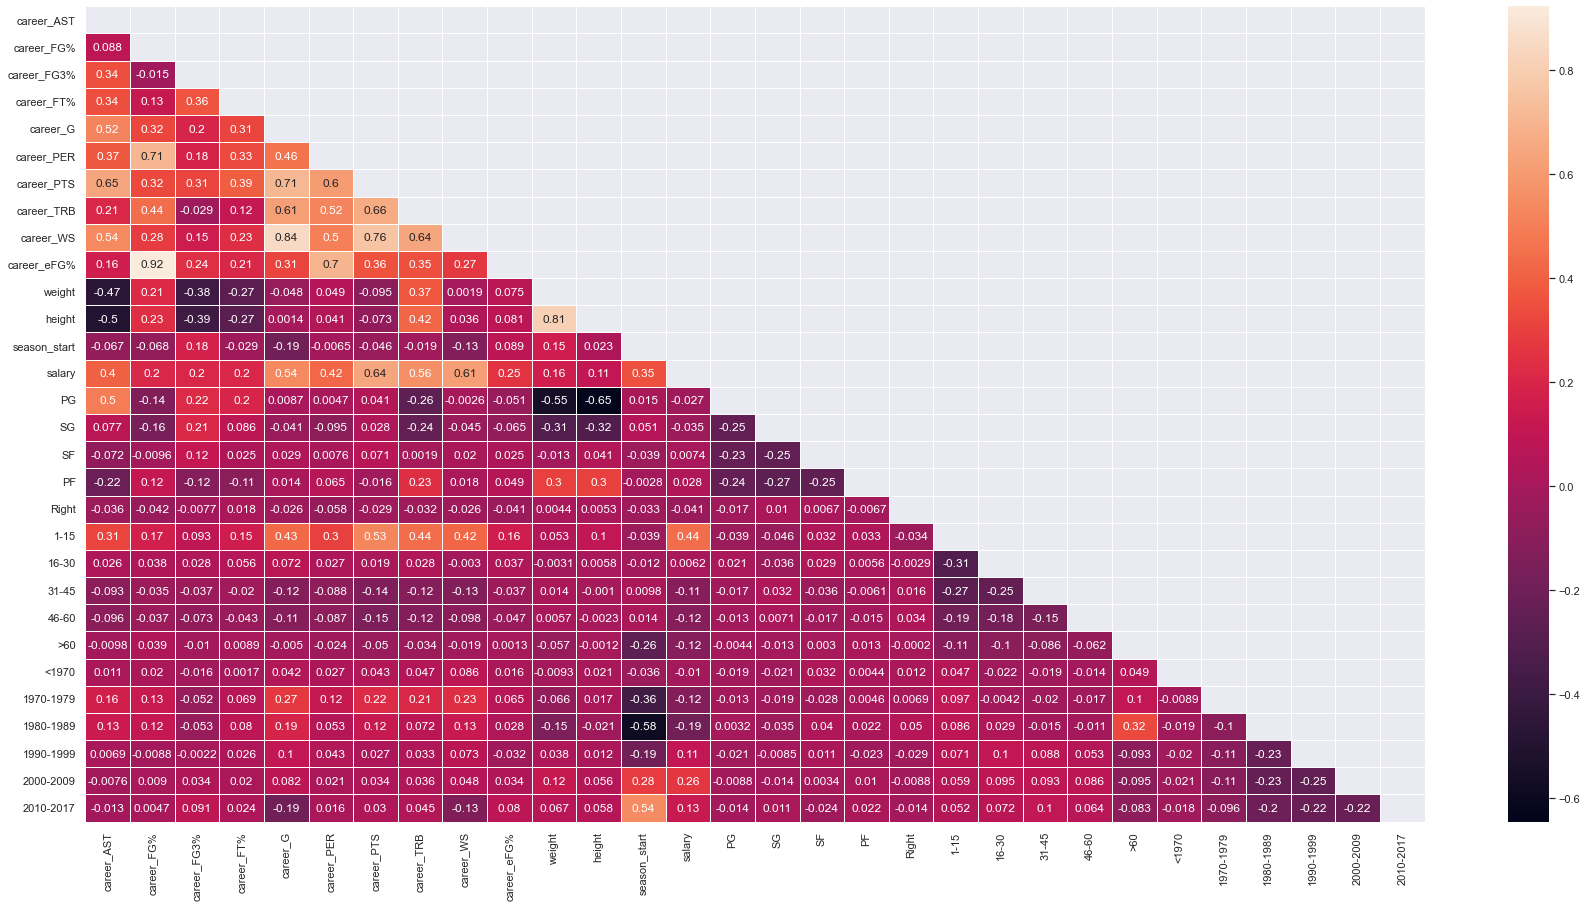

In [97]:
#Heatmap representing the correlation coefficients

plt.figure(figsize=(30, 15))
correlationMatrix = career_sal.corr()
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlationMatrix, annot =True, linewidth = .5, mask=mask)
heatmap

## Regression Experiment 1

In [110]:
#Save updated csv
career_sal.to_csv(r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\career_sals.csv', index = False)

In [93]:
#Re-importing csv 
career_sal = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\career_sals.csv')

In [9]:
#Regression Modeling 

from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [94]:
#dropping uneeded variable and the target variable
X = career_sal.drop(["name", "salary"], axis=1)

#keeping only the target variable 
y = career_sal["salary"]

X.shape, y.shape

((2385, 29), (2385,))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [96]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [97]:
#R^2 score based on a random split
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg.fit(X_train, y_train)
    count = count + reg.score(X_test, y_test)
print(count/1000)

0.7213273881003481


In [98]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [99]:
#Coefficients
reg.coef_

array([ 2.10380310e+05, -1.11720077e+04, -2.31326504e+03, -1.26012168e+03,
        1.01357407e+03,  1.34327033e+04,  1.46928195e+05,  1.04104686e+05,
        1.70646444e+04, -3.86460673e+03,  5.32172418e+03,  5.68333036e+04,
        4.53789573e+04,  5.10877701e+04,  1.29094667e+05,  3.03764434e+03,
       -1.05108987e+05,  4.82038998e+04, -7.17756770e+04, -7.13841377e+05,
       -7.08490522e+05, -8.04353847e+05,  3.49560527e+05, -2.73361516e+06,
       -2.27649219e+06, -5.33274131e+05,  1.14226445e+06,  1.38519048e+06,
        1.06702564e+06])

In [100]:
#The intercept
print('Intercept: %.2f'
      % reg.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Intercept: -96460236.23
Mean squared error: 1976949877732.82
Root Mean squared error: 1406040.50
Coefficient of determination: 0.72


In [101]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred, 
                       '% Difference': (y_test-y_pred)/y_pred })
pred_df[0:10]

,Actual Value,Predicted Value,Difference,% Difference
1622,1.745000e+05,1.265155e+06,-1.090655e+06,-0.862072
1650,8.798483e+05,5.575472e+05,3.223011e+05,0.578070
1127,8.180179e+05,1.356485e+06,-5.384673e+05,-0.396958
2001,3.000000e+05,-7.601675e+05,1.060167e+06,-1.394650
332,6.286667e+05,1.387036e+06,-7.583697e+05,-0.546755
565,1.533480e+06,2.244992e+06,-7.115120e+05,-0.316933
733,8.906807e+06,7.698358e+06,1.208449e+06,0.156975
1304,6.175597e+06,4.525498e+06,1.650099e+06,0.364623
2279,2.313542e+06,1.840538e+06,4.730037e+05,0.256992
100,8.097362e+06,5.478645e+06,2.618717e+06,0.477986


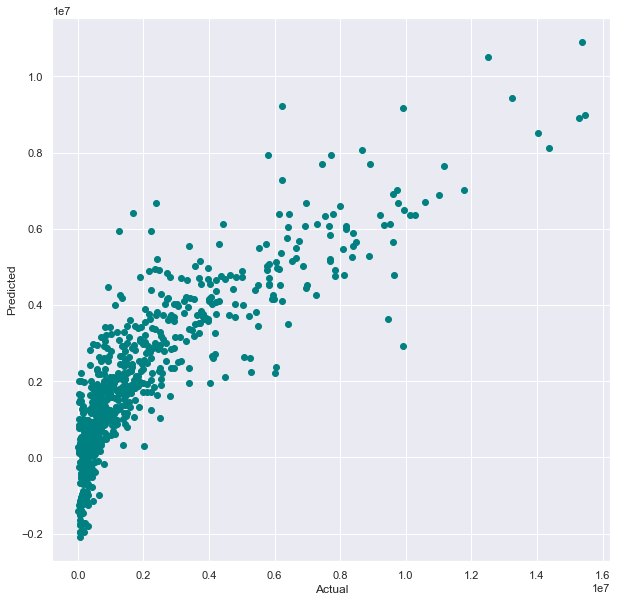

In [102]:
#Vizualizing the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()

## Regression Experiment 2

In [188]:
#Trying a new regression model after standardizaton

#Re-importing csv 
career_sal = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\career_sals.csv')

In [189]:
career_sal.columns

Index(['name', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'weight', 'height', 'season_start', 'salary', 'PG', 'SG',
       'SF', 'PF', 'Right', '1-15', '16-30', '31-45', '46-60', '>60', '<1970',
       '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2017'],
      dtype='object')

In [190]:
#dropping uneeded variable and the target variable
X = career_sal.drop(["name", "salary", 'PG', 'SG', 'SF', 'PF', 'Right', '1-15',
       '16-30', '31-45', '46-60', '>60', '<1970', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2017'], axis=1)
x_dum = career_sal[['PG', 'SG', 'SF', 'PF', 'Right', '1-15',
       '16-30', '31-45', '46-60', '>60', '<1970', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2017']]

#keeping only the target variable 
y = career_sal["salary"]

X.shape, y.shape, x_dum.shape

((2385, 13), (2385,), (2385, 16))

In [191]:
#Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)



In [192]:
#Convert Array to Data frame and combine with dummies
x_scaled = pd.DataFrame(x_scaled, columns=['career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'weight', 'height',
       'season_start'])
x_scaled = pd.concat([x_scaled, x_dum], axis=1)
x_scaled

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,...,16-30,31-45,46-60,>60,<1970,1970-1979,1980-1989,1990-1999,2000-2009,2010-2017
0,-0.303072,0.677511,0.140640,0.224865,2.664147,0.421900,0.524501,2.005750,2.640981,0.415351,...,1,0,0,0,0,0,1,0,0,0
1,-1.034475,-2.862285,-1.479167,-4.221518,-1.059173,-2.253454,-1.226203,-0.141890,-0.638836,-3.138817,...,0,1,0,0,0,0,0,1,0,0
2,0.361840,-0.009489,-0.599114,0.491406,-0.639933,-0.084248,0.585572,-0.468704,-0.596070,-0.304625,...,0,1,0,0,0,0,0,1,0,0
3,0.162367,-0.684845,0.931411,0.757946,-0.848087,-0.210785,-0.310137,-0.982270,-0.622388,-0.053205,...,0,1,0,0,0,0,0,0,1,0
4,-0.901492,-0.358811,1.709428,-1.495534,-1.018129,-0.662703,-0.981919,-0.702143,-0.632257,-0.007492,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,-0.901492,0.048732,-1.479167,-0.223408,-0.689773,0.349593,-0.534064,0.184925,-0.533566,-0.281768,...,0,0,0,0,0,0,0,0,0,0
2381,-0.967983,-2.606115,-0.809562,-0.181004,-1.026924,-1.729229,-1.165132,-0.888895,-0.638836,-2.544550,...,0,1,0,0,0,0,0,0,0,1
2382,-0.835001,-0.801285,-0.114448,-0.586872,-1.035719,-0.698856,-1.063347,-1.215709,-0.635547,-0.544617,...,0,0,0,0,0,0,0,0,0,0
2383,-0.303072,-0.358811,0.363841,-0.120426,-0.648728,-0.445783,-0.656207,-0.842207,-0.582912,-0.247484,...,1,0,0,0,0,0,0,0,1,0


In [193]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [194]:
reg2 = LinearRegression()
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)
    reg2.fit(X_train, y_train)
    count = count + reg2.score(X_test, y_test)
print(count/1000)

0.7213273881003481


In [195]:
#Trying a new regression model after removing variables with high collinearity and low correlation with salary 

#Remove FG% and eFG%, keep PER 
#Remove games played, keep win share
#Remove height, keep weight since it is correlated with salary more (Estimate for size)
#Remove positions and shooting hand as they seem very uncorrelated with salary 
#Remove 16-30 and <1970 because they have very low correlation with salary

x_scaled = x_scaled.drop(['career_FG%', 'career_eFG%', 'career_G', 'height', 'PG', 'SG', 
                              'SF', 'PF', 'Right', '16-30', '<1970'], axis=1)

In [196]:
x_scaled.shape, y.shape

((2385, 18), (2385,))

In [197]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [198]:
reg2 = LinearRegression()
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)
    reg2.fit(X_train, y_train)
    count = count + reg2.score(X_test, y_test)
print(count/1000)

0.724166241375694


In [201]:
# Make predictions using the testing set
y_pred = reg2.predict(X_test)

In [202]:
#Coefficients
reg2.coef_

array([  296206.27514234,   -24570.31480461,    10377.2520798 ,
         -42728.41120049,   730065.88085724,   282996.83389073,
         730312.31404709,   223182.9859271 ,   530091.67391435,
         627974.98564788,   -80714.5976661 ,  -198765.46379868,
         863395.76696641, -2476668.93086498,  -860068.44189695,
         707816.82955271,   856015.82078883,   363505.25431328])

In [203]:
#The intercept
print('Intercept: %.2f'
      % reg2.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Intercept: 1705236.14
Mean squared error: 1956810580234.70
Root Mean squared error: 1398860.46
Coefficient of determination: 0.72


## Regression Experiment 3

In [204]:
#Trying a new regression model after normalizing data and assuring normal distrubution 

#Re-importing csv 
career_sal = pd.read_csv (r'C:\Users\andre\Downloads\NBA Salaries 1984-2017\career_sals.csv')

In [205]:
career_sal.columns

Index(['name', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'weight', 'height', 'season_start', 'salary', 'PG', 'SG',
       'SF', 'PF', 'Right', '1-15', '16-30', '31-45', '46-60', '>60', '<1970',
       '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2017'],
      dtype='object')

In [206]:
#Dropping variables that are uneeded 
career_sal = career_sal.drop(['name', 'career_FG%', 'career_eFG%', 'career_G', 'height', 'PG', 'SG', 
                              'SF', 'PF', 'Right', '16-30', '<1970'], axis=1)

In [207]:
career_sal.columns

Index(['career_AST', 'career_FG3%', 'career_FT%', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'weight', 'season_start', 'salary', '1-15',
       '31-45', '46-60', '>60', '1970-1979', '1980-1989', '1990-1999',
       '2000-2009', '2010-2017'],
      dtype='object')

In [208]:
#Separating continuous variables for normalization 
con_vars = career_sal.drop(['1-15', '31-45', '46-60', '>60', '1970-1979', '1980-1989', '1990-1999',
       '2000-2009', '2010-2017', 'salary'], axis=1)
x_dum = career_sal[['1-15', '31-45', '46-60', '>60', '1970-1979', '1980-1989', '1990-1999',
       '2000-2009', '2010-2017']]
y = career_sal['salary']

con_vars.shape, x_dum.shape, y.shape

((2385, 9), (2385, 9), (2385,))

In [209]:
#Normalizing the data
scaler = preprocessing.MinMaxScaler()
names = con_vars.columns
d = scaler.fit_transform(con_vars)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,career_AST,career_FG3%,career_FT%,career_PER,career_PTS,career_TRB,career_WS,weight,season_start
0,0.098214,0.254,0.734,0.460190,0.318937,0.540146,0.370156,0.383260,0.272727
1,0.000000,0.000,0.000,0.352082,0.033223,0.204380,0.009055,0.414097,0.454545
2,0.187500,0.138,0.778,0.439737,0.328904,0.153285,0.013763,0.185022,0.242424
3,0.160714,0.378,0.822,0.434624,0.182724,0.072993,0.010866,0.207048,0.515152
4,0.017857,0.500,0.450,0.416362,0.073090,0.116788,0.009779,0.559471,0.969697


In [210]:
#Combining normalized and dummy data
X = pd.concat([scaled_df, x_dum], axis=1)

X.shape, y.shape

((2385, 18), (2385,))

In [211]:
X

,career_AST,career_FG3%,career_FT%,career_PER,career_PTS,career_TRB,career_WS,weight,season_start,1-15,31-45,46-60,>60,1970-1979,1980-1989,1990-1999,2000-2009,2010-2017
0,0.098214,0.254,0.734,0.460190,0.318937,0.540146,0.370156,0.383260,0.272727,0,0,0,0,0,1,0,0,0
1,0.000000,0.000,0.000,0.352082,0.033223,0.204380,0.009055,0.414097,0.454545,0,1,0,0,0,0,1,0,0
2,0.187500,0.138,0.778,0.439737,0.328904,0.153285,0.013763,0.185022,0.242424,0,1,0,0,0,0,1,0,0
3,0.160714,0.378,0.822,0.434624,0.182724,0.072993,0.010866,0.207048,0.515152,0,1,0,0,0,0,0,1,0
4,0.017857,0.500,0.450,0.416362,0.073090,0.116788,0.009779,0.559471,0.969697,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,0.017857,0.000,0.660,0.457268,0.146179,0.255474,0.020645,0.515419,0.575758,0,0,0,0,0,0,0,0,0
2381,0.008929,0.105,0.667,0.373265,0.043189,0.087591,0.009055,0.339207,1.000000,0,1,0,0,0,0,0,0,1
2382,0.026786,0.214,0.600,0.414901,0.059801,0.036496,0.009417,0.295154,0.909091,0,0,0,0,0,0,0,0,0
2383,0.098214,0.289,0.677,0.425128,0.126246,0.094891,0.015212,0.273128,0.606061,0,0,0,0,0,0,0,1,0


In [212]:
X.columns

Index(['career_AST', 'career_FG3%', 'career_FT%', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'weight', 'season_start', '1-15', '31-45',
       '46-60', '>60', '1970-1979', '1980-1989', '1990-1999', '2000-2009',
       '2010-2017'],
      dtype='object')

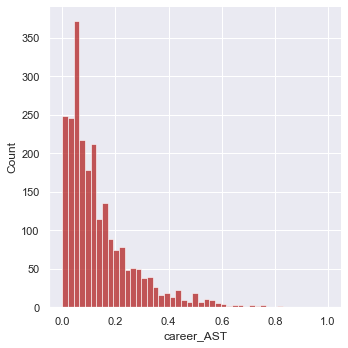

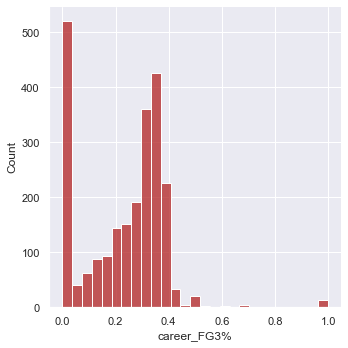

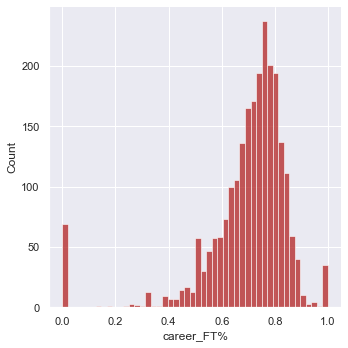

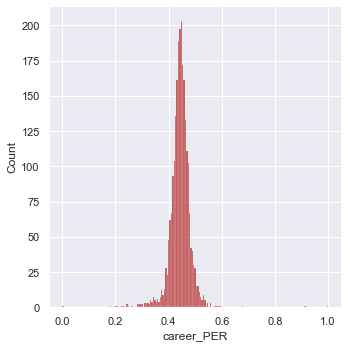

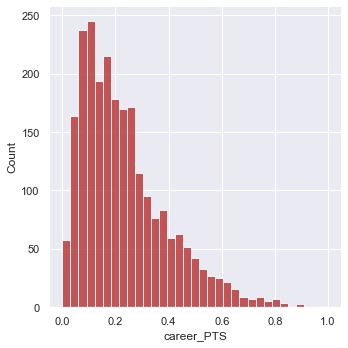

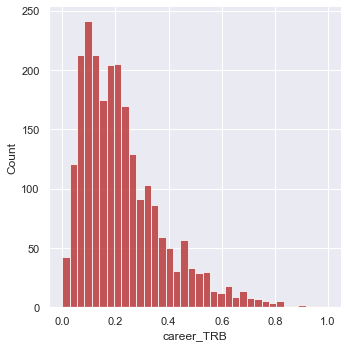

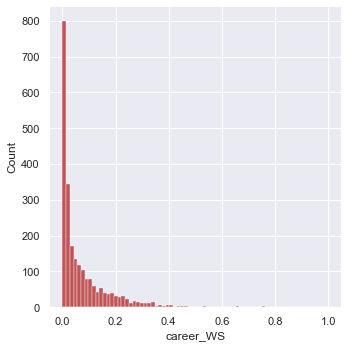

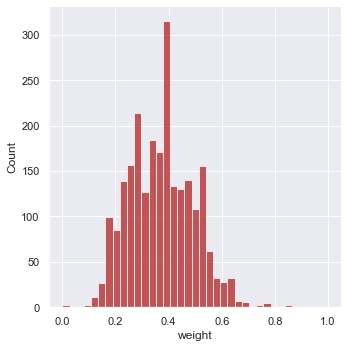

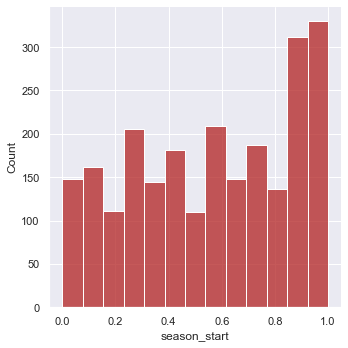

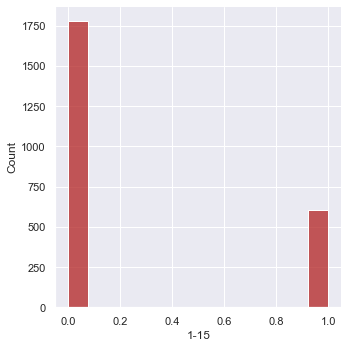

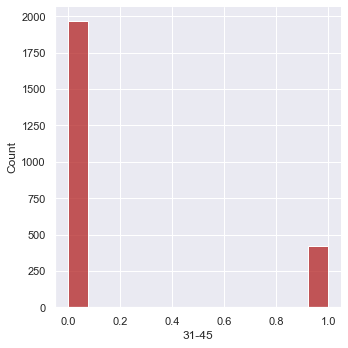

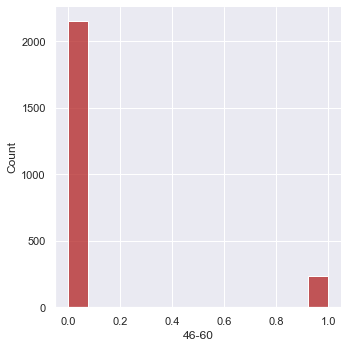

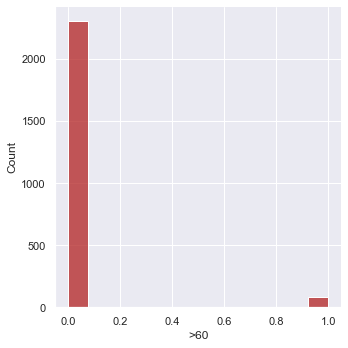

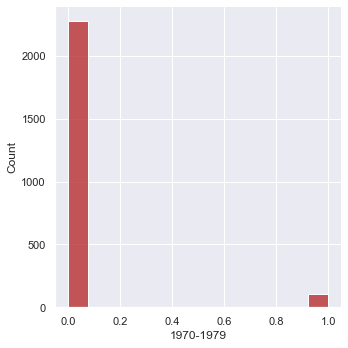

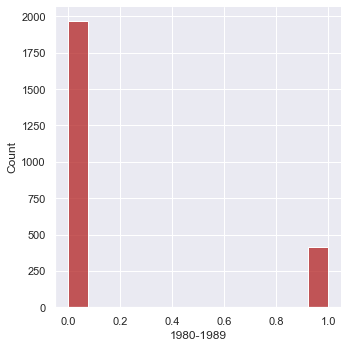

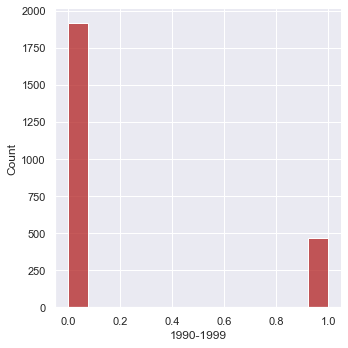

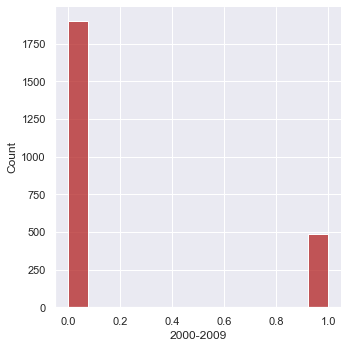

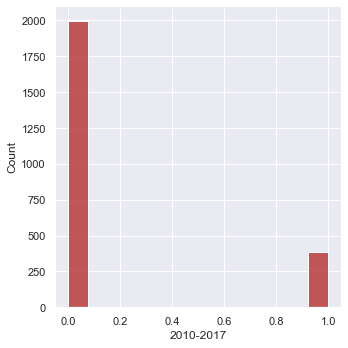

In [171]:
for column in X.columns:
    sns.displot(X[column], color='firebrick');
    

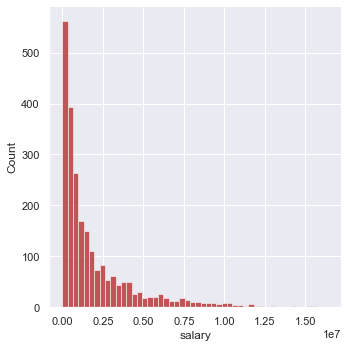

In [149]:
sns.displot(y, color='firebrick');

In [172]:
X['career_AST'] = np.sqrt(np.sqrt(X['career_AST']))
X['career_FG3%'] = np.sqrt(X['career_FG3%'])
X['career_PTS'] = np.sqrt(X['career_PTS'])
X['career_TRB'] = np.sqrt(X['career_TRB'])
X['career_WS'] = np.sqrt(np.sqrt(np.sqrt(np.sqrt(X['career_WS']))))

y = np.sqrt(np.sqrt(y))

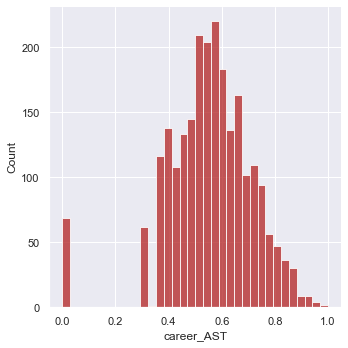

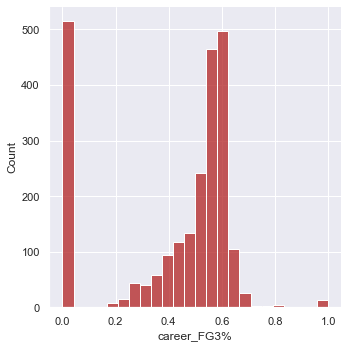

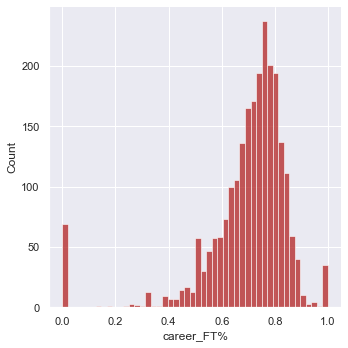

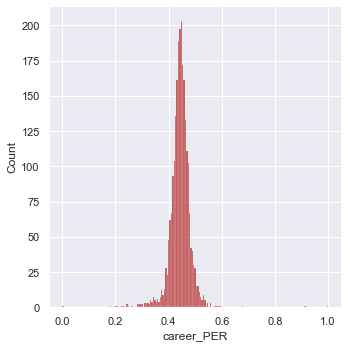

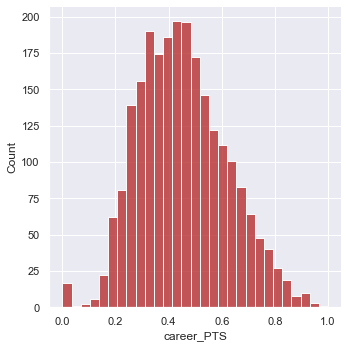

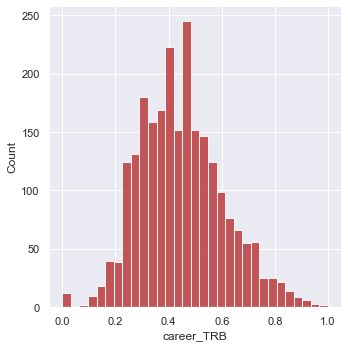

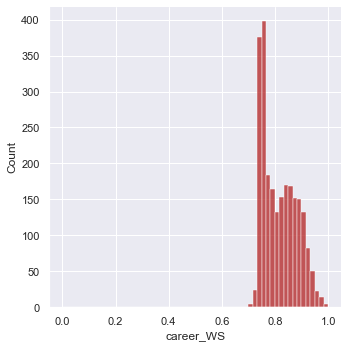

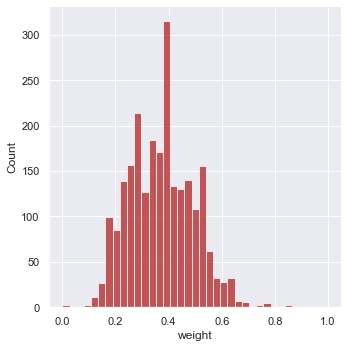

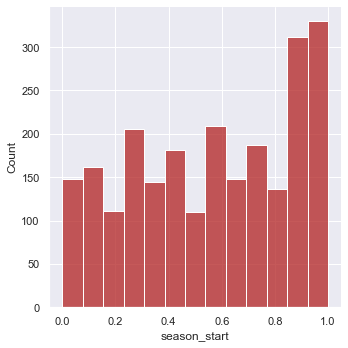

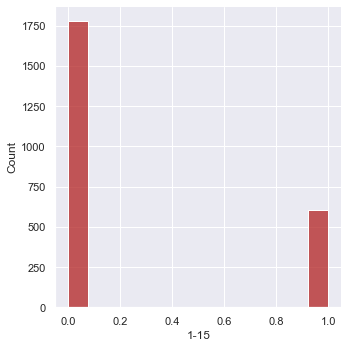

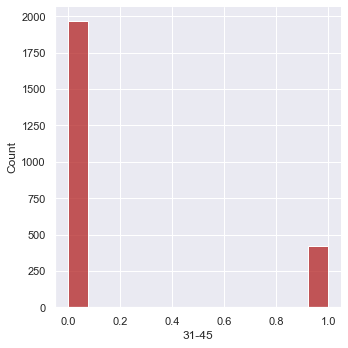

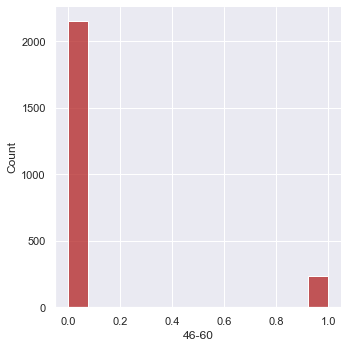

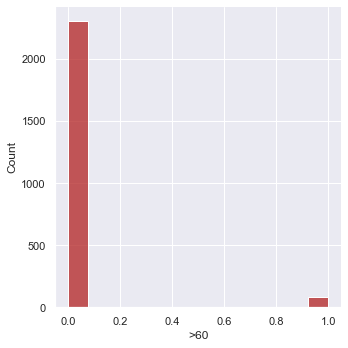

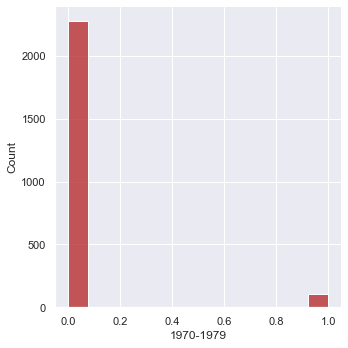

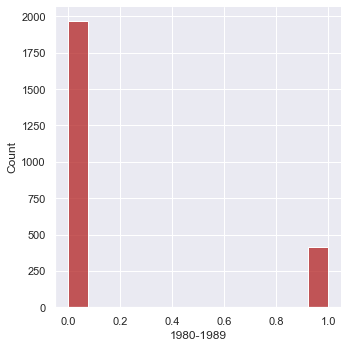

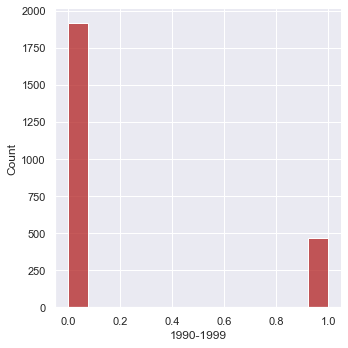

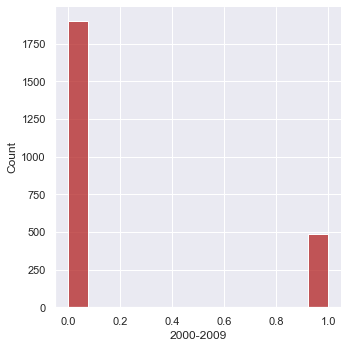

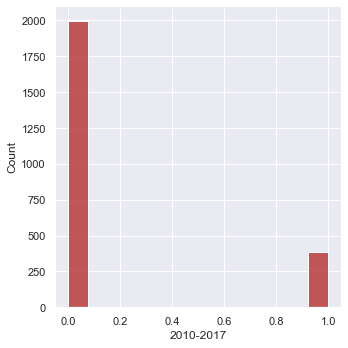

In [173]:
for column in X.columns:
    sns.displot(X[column], color='firebrick');

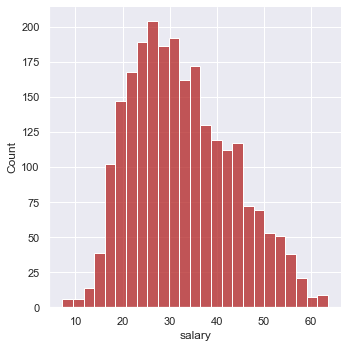

In [174]:
sns.displot(y, color='firebrick');

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [153]:
#getting an average score based on the random splits
reg2 = LinearRegression()
count = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
    reg2.fit(X_train, y_train)
    count = count + reg2.score(X_test, y_test)
print(count/100)

0.8261770185407995


In [154]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((716, 18), (716,), (1669, 18), (1669,))

In [155]:
# Make predictions using the testing set
y_pred = reg2.predict(X_test)

In [156]:
#Coefficients
reg2.coef_

array([  4.83773695,   0.1733582 ,   1.46609051, -11.15380087,
        13.27837229,   5.96774056,  62.25242347,   7.76829916,
         9.57844858,   2.57254562,  -2.06041749,  -2.37897071,
        -0.40731836,  -7.5746646 ,  -1.23274067,   5.63167833,
         6.01727927,   4.5154396 ])

In [157]:
#The intercept
print('Intercept: %.2f'
      % reg2.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Intercept: -36.52
Mean squared error: 20.45
Root Mean squared error: 4.52
Coefficient of determination: 0.83


In [158]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred, 
                       '% Difference': (y_test-y_pred)/y_pred })
pred_df[0:10]

,Actual Value,Predicted Value,Difference,% Difference
1622,20.438492,29.629749,-9.191257,-0.310204
1650,30.626823,27.175322,3.451501,0.127009
1127,30.073965,32.058595,-1.984630,-0.061906
2001,23.403473,16.748813,6.654661,0.397321
332,28.158214,30.617735,-2.459521,-0.080330
565,35.190021,35.610967,-0.420945,-0.011821
733,54.629912,55.395596,-0.765683,-0.013822
1304,49.850525,45.286723,4.563802,0.100776
2279,39.000425,31.680960,7.319465,0.231037
100,53.344038,50.670014,2.674024,0.052773


In [159]:
X_test.size, y_test.size

(12888, 716)

In [160]:
y_pred.shape

(716,)

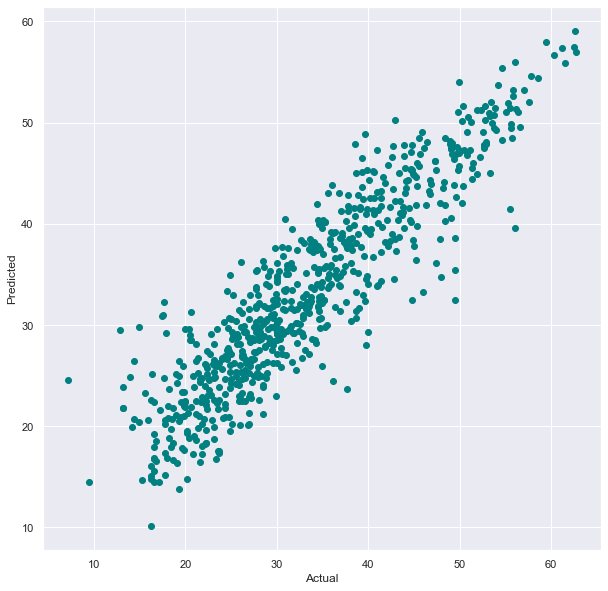

In [161]:
#Vizualizing the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()

## Using Ridge Regression  

In [175]:
#Use Ridge Regression for final experiment 

reg_ridge = linear_model.Ridge(alpha=.01) 

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [177]:
count = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42) 
    reg_ridge.fit(X_train, y_train)
    count = count + reg_ridge.score(X_test, y_test)
print(count/100)

0.8260587258249731


In [178]:
# Make predictions using the testing set
y_pred = reg2.predict(X_test)

In [179]:
#Coefficients
reg2.coef_

array([  4.83773695,   0.1733582 ,   1.46609051, -11.15380087,
        13.27837229,   5.96774056,  62.25242347,   7.76829916,
         9.57844858,   2.57254562,  -2.06041749,  -2.37897071,
        -0.40731836,  -7.5746646 ,  -1.23274067,   5.63167833,
         6.01727927,   4.5154396 ])

In [180]:
#The intercept
print('Intercept: %.2f'
      % reg2.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Intercept: -36.52
Mean squared error: 20.45
Root Mean squared error: 4.52
Coefficient of determination: 0.83
